<a href="https://colab.research.google.com/github/kathuman/Python-Experiments/blob/main/Python-Mechanical_engineering/200324_Wave_Equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

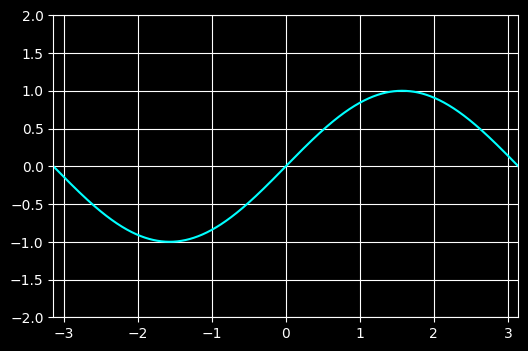

In [1]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib inline

plt.style.use('dark_background')

fig = plt.figure()
fig.set_dpi(100)
ax1 = fig.add_subplot(1,1,1)

#Wave speed
c = 1

#x axis
x0 = np.linspace(-pi,pi,10000)

#Initial time
t0 = 0

#Time increment
dt = 0.05

#Wave equation solution
def u(x,t):
    return 0.5*(np.sin(x+c*t) + np.sin(x-c*t))

a = []

for i in range(500):
    value = u(x0,t0)
    t0 = t0 + dt
    a.append(value)

k = 0
def animate(i):
    global k
    x = a[k]
    k += 1
    ax1.clear()
    plt.plot(x0,x,color='cyan')
    plt.grid(True)
    plt.ylim([-2,2])
    plt.xlim([-pi,pi])
    
anim = animation.FuncAnimation(fig,animate,frames=360,interval=20)
plt.show()

In [2]:
from numpy import*
import tkinter as Tkinter
import time

dt = 0.0001
dx = 0.1
v = 100 #Courant condition says dx/dt >= v
gamma = 0
c1 = (v**2) * (dt**2) / (dx**2)
c2 = gamma*dt / dx**2

nodes = 30
source_node = int(nodes/3) #point of application of initial pulse
x = arange(0, nodes, 1)
u_new = zeros(nodes)
u = zeros(nodes)
u_old = zeros(nodes)

##--Tkinter stuff--
t_start = time.time()#for referencing
height = 300.0
width = 400.0
center = height//2
x_factor = width/(nodes-1)
y_factor = 200
##------------------
u[source_node] = -10
u_old[source_node] = -10
	
def paint(canvas, parent):
	for i in range (1, nodes-1):
		U1 = u[i+1] - 2*u[i] + u[i-1]
		U0 = u_old[i+1] - 2*u_old[i] + u_old[i-1]
		u_new[i] = c1*U1 + c2*(U1-U0) + 2.0*u[i] - u_old[i]
	for i in range (0, nodes):
		u_old[i] = u[i]
		u[i] = u_new[i]
	xy=[]
	for i in range(0, nodes):
		xy.append((int)(i*x_factor))
		xy.append((int)(u_new[i]*y_factor)+center)
	#time.sleep(0.001)	
	c.coords("curve", *xy)
	parent.after_idle(paint,parent,canvas)
	##------------------	
#--Tkinter stuff:--
root = Tkinter.Tk()
root.title("Animated wave equation - initial pulse at L/3")
root.bind('q','exit')
c = Tkinter.Canvas(width=width, height=height, bg='white')
c.pack()
c.create_line(tag = "curve", *zeros(2*width), fill='blue')	
root.after(100,paint,root,c)
root.mainloop()	
##------------------

TclError: ignored